# Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

 ## Diccionario de datos
 
<table>
     <caption style="text-align:center">Games Table</caption>
  <tr>
    <th>Field</th>
    <th>Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Name</td>
    <td>String</td>
    <td>Platform where game runs(Wii, Playstation, Xbox)</td>
  </tr>
  <tr>
    <td>Platform</td>
    <td>String</td>
    <td>Platform where game runs(Wii, Playstation, Xbox)</td>
  </tr>
  <tr>
    <td>Genre</td>
    <td>String</td>
    <td>Category how the game was classified</td>
  </tr>
   <tr>
    <td>NA_sales</td>
    <td>Fload</td>
    <td>Quantity of sales per million in United States</td>
  </tr>
  <tr>
    <td>JP_sales</td>
    <td>Fload</td>
    <td>Quantity of sales per million in Japan</td>
  </tr>
  <tr>
    <td>EU_sales</td>
    <td>Fload</td>
    <td>Quantity of sales per million in Europe</td>
  </tr>
  <tr>
    <td>Other_sales</td>
    <td>Fload</td>
    <td>Quantity of sales per million in Other countries</td>
  </tr>
  <tr>
    <td>Critic_Score</td>
    <td>Fload</td>
    <td>Score about the game from 1 to 10 Where 1 y lower and 10 is the higher</td>
  </tr>
  <tr>
    <td>Rating</td>
    <td>String</td>
    <td>Type of public classification ESRB</td>
  </tr>     
</table> 




## Ajuste de informacion

### Data, Imports and Variables

In [51]:
from scipy import stats as st
from math import factorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import heapq  as hq

In [52]:
df_games = pd.read_csv('C:/Users/Develop/Documents/Python/Project_6/Files/games.csv')

In [53]:
#Functions
#Build a dict whatever array
def fliped_dict(array_a,array_b):
    aim_field = 0
    data_out={}
    for field in array_b:
        data_out[array_a[aim_field]]=field
        aim_field+=1
    return data_out

#Change titles to lower or upper        
def ajust_titles(data,lower = True):
    #Transform columns to upper or lower
    if lower:
        columns=data.columns.str.lower()
    else:
        columns=data.columns.str.upper()

    return fliped_dict(data.columns,columns)   #Return dict   


#Variables
games_categories = {
    'NINTENDO': ['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'WiiU', 'GC', 'WS'],
    'MICROSOFT': ['X360', 'XB', 'XOne'],
    'SONY': ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'],
    'SEGA': ['GEN', 'DC', 'SAT', 'SCD', 'GG'],
    'ATARI/NEC/3DO/SNK': ['2600','TG16', 'PCFX','3DO','NG'],
    'VARIUOS/PC': ['PC']
}

region_sales = ['na_sales', 'eu_sales','jp_sales', 'other_sales']

### Edicion de columnas

In [54]:
df_games.rename(columns=ajust_titles(df_games),
                inplace=True)

In [55]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Tipo de datos y completado de NaN

In [56]:
#df_games['name'] 
df_games['year_of_release'] = df_games.year_of_release.fillna(1900)
df_games['critic_score'] = df_games.critic_score.fillna(99)
df_games['rating'] = df_games.rating.fillna('NaN')

Los datos NaN(String) en year_of_release no permiten realizar el ajuste a Integer por lo que se debio rellenar los Nan por 1900 dado que no se puede  determinar a primera mano de que fechas pertenecen.
Los valores vacios en critic_score se completaron con 99 indicando que no han sido clasificados, en rating los valores fueron completados con NaN dado que aun no reciben una clasificacion al publico.

In [57]:
df_filter = df_games.user_score.str.isalpha() ==  True
fileds_value = df_games[df_filter].user_score.unique()
print(fileds_value)

['tbd']


In [58]:
replace_tbd = fliped_dict(fileds_value,[99])

El filtro de isalpha() sobre la columna 'user_score' identifico por que se al intentar homologar las columnas se generaba un error de tipo de datos, tdb no es un dato numerico por lo que se procedera a reemplazar por 999 para ajustarlas. 

In [59]:
user_score_replaced_tbd = df_games.user_score.replace(replace_tbd)
df_games['user_score'] = user_score_replaced_tbd.fillna(99)
df_games['user_score'] = df_games.user_score.astype('Float64')
df_games['year_of_release'] = df_games.year_of_release.astype('int')
df_games['critic_score'] = df_games.critic_score.astype('Float64')

Una vez se ajusto el valor se llenaron vacios con 99 para identificar los juegos no valorados y poder ajustar el formato de la columna

In [60]:
df_games['genre'] = df_games.genre.fillna('Unknown')
df_games['name'] = df_games.name.fillna('Unknown')

Para los campos de nombre y genero se completo con Unknown dado que no es posible completar la informacion con alguna base de datos de soporte.

In [61]:
df_games['name'] = df_games.name.str.upper()
df_games['genre'] = df_games.genre.str.upper()

In [62]:
df_games['platform'].astype('category')

0         Wii
1         NES
2         Wii
3         Wii
4          GB
         ... 
16710     PS3
16711    X360
16712     PSV
16713     GBA
16714     PSV
Name: platform, Length: 16715, dtype: category
Categories (31, object): ['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne']

Se utilizaran los generos y nombres en mayusculas a fin de validar duplicados en pasos futuros.

In [63]:
df_games['total_sales'] = df_games.na_sales + 	df_games.eu_sales	+ df_games.jp_sales + df_games.other_sales

In [64]:
#Sum sales per region
sales_total_per_region={
                        df_games.na_sales.name : df_games.na_sales.sum(),
                        df_games.eu_sales.name : df_games.eu_sales.sum(),
                        df_games.jp_sales.name : df_games.jp_sales.sum(),
                        }

In [65]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,WII SPORTS,Wii,2006,SPORTS,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,SUPER MARIO BROS.,NES,1985,PLATFORM,29.08,3.58,6.81,0.77,99.0,99.0,NaN,40.24
2,MARIO KART WII,Wii,2008,RACING,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,WII SPORTS RESORT,Wii,2009,SPORTS,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,POKEMON RED/POKEMON BLUE,GB,1996,ROLE-PLAYING,11.27,8.89,10.22,1.00,99.0,99.0,NaN,31.38


## Analisis

### Linea de tiempo en relacion con la cantidad de juegos lanzados

Text(0, 0.5, 'Quantity')

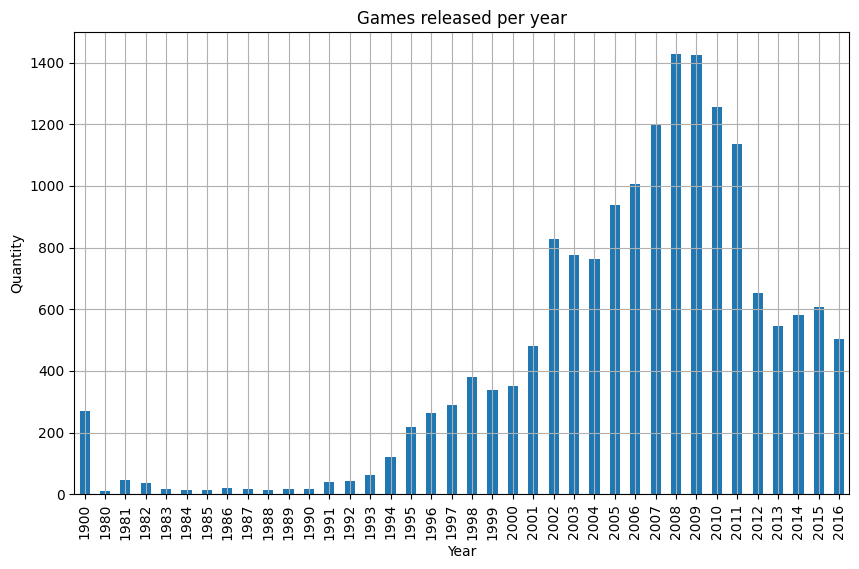

In [66]:
games_per_year = df_games.loc[:,['year_of_release','genre']].groupby(['year_of_release'],as_index=False).count()
games_per_year_graph = games_per_year.plot(title='Games released per year',
                    kind='bar',
                    x='year_of_release',
                    y='genre',
                    figsize=(10,6), 
                    grid=True,
                    legend=False)
games_per_year_graph.set_xlabel('Year')
games_per_year_graph.set_ylabel('Quantity')


Entre el 2002 y 2011 la cantidad de juegos lanzados fue sustancialmente lo que podria tener relacion con las plataformas lanzadas y su relacion con nuevas tecnologias. 

### Linea de tiempo en relacion las ventas y las diferentes plataformas por compañia

In [67]:
#Homologate plartform to company
df_games['companies']= df_games['platform'].map(lambda platform: #to each row in platform do next:
        [name_company for name_company, list_to_homologate in games_categories.items() 
        if platform in list_to_homologate][0]  #read if platform exist in list_to_homologate if It's true do.. If not Return Unknown
            if any(platform in list_to_homologate for name_company, list_to_homologate in games_categories.items()) #if any platform in list_to_homologate for companies
        else 'Unknown')    

Debido a la cantidad de datos fue necesario crear una subcategoria por compañias e intentar leer los datos de forma sectorizada y un poco mas clara y amable a la vista.

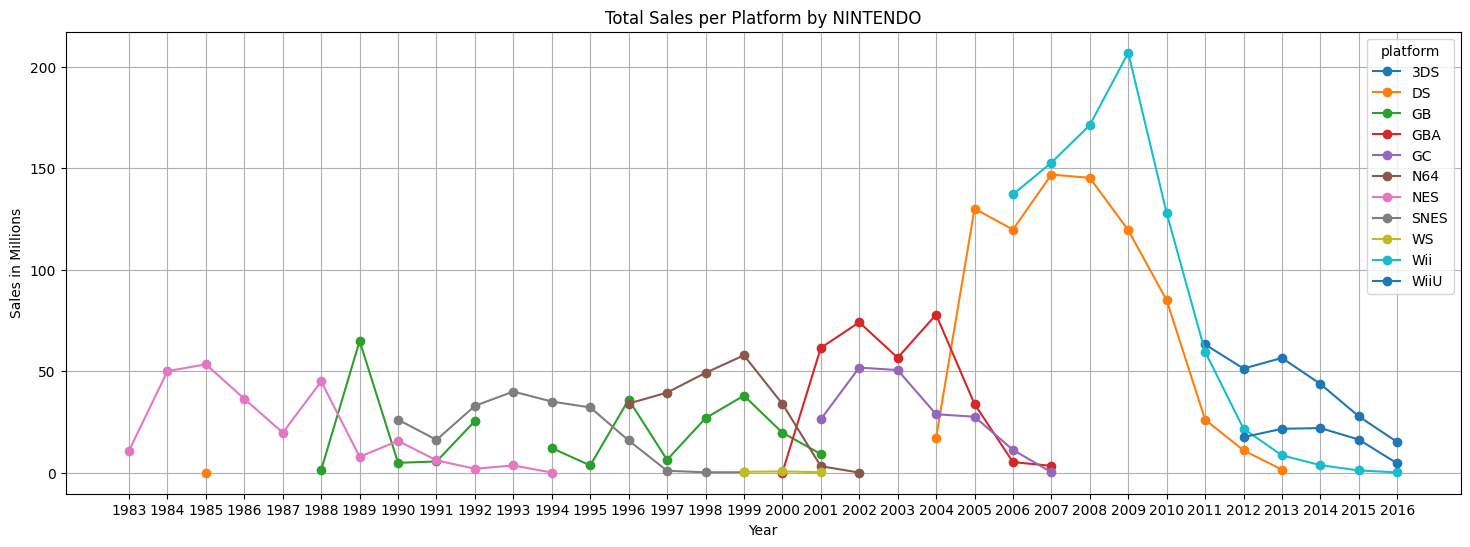

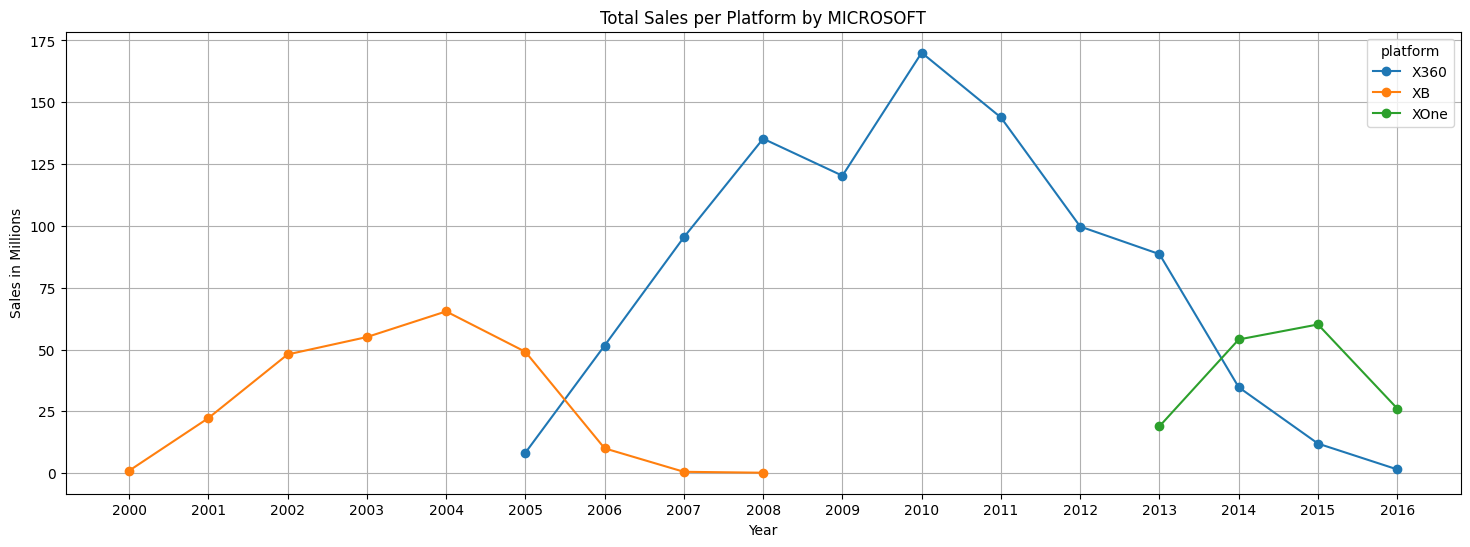

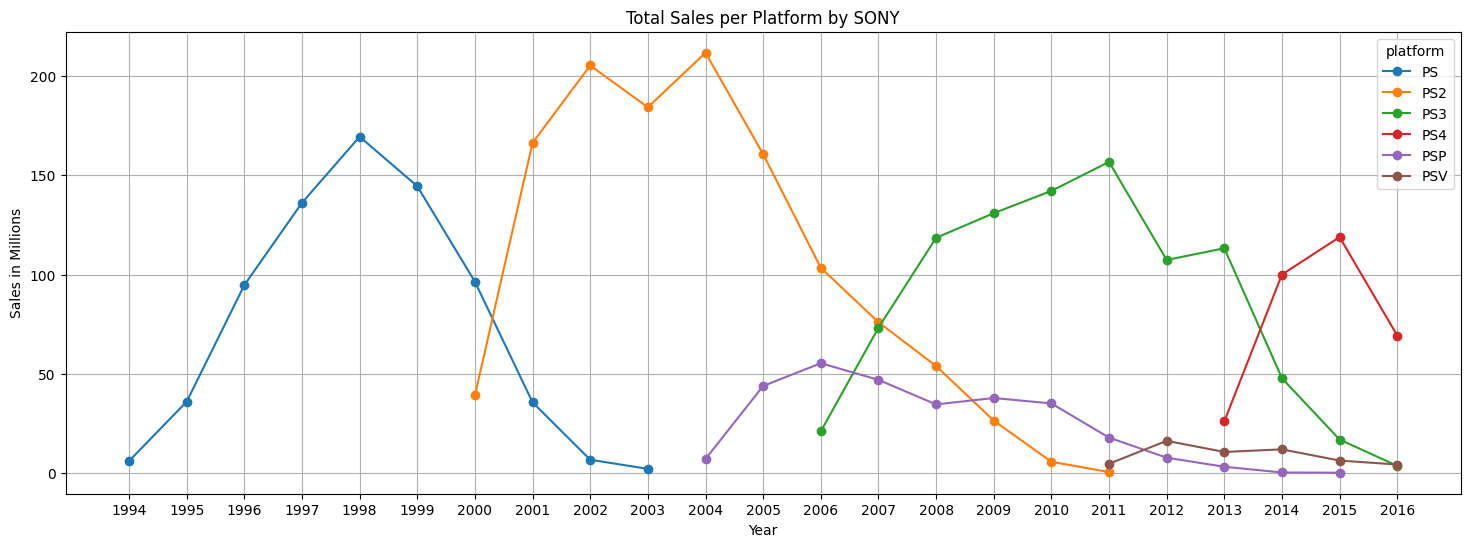

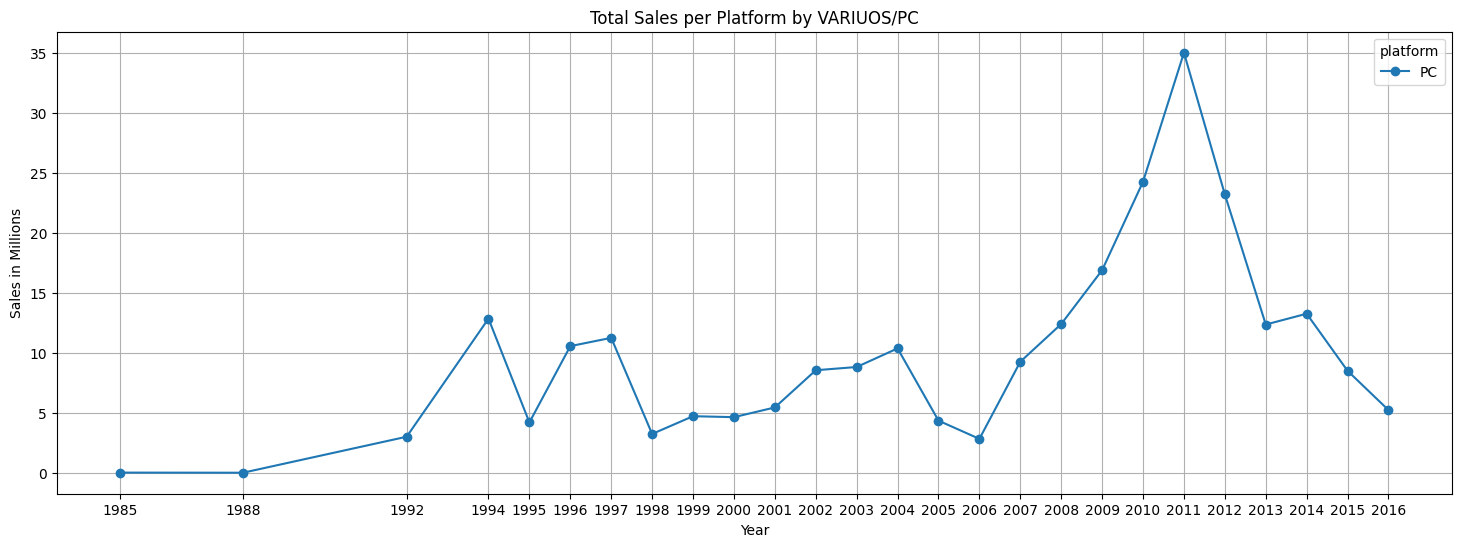

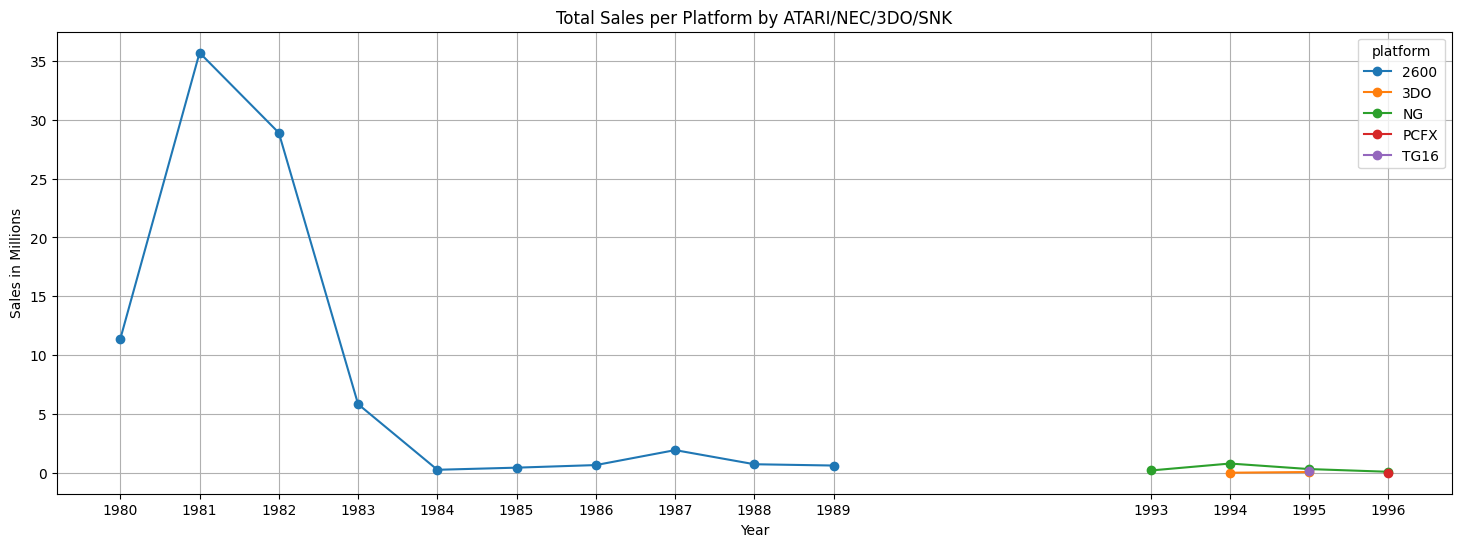

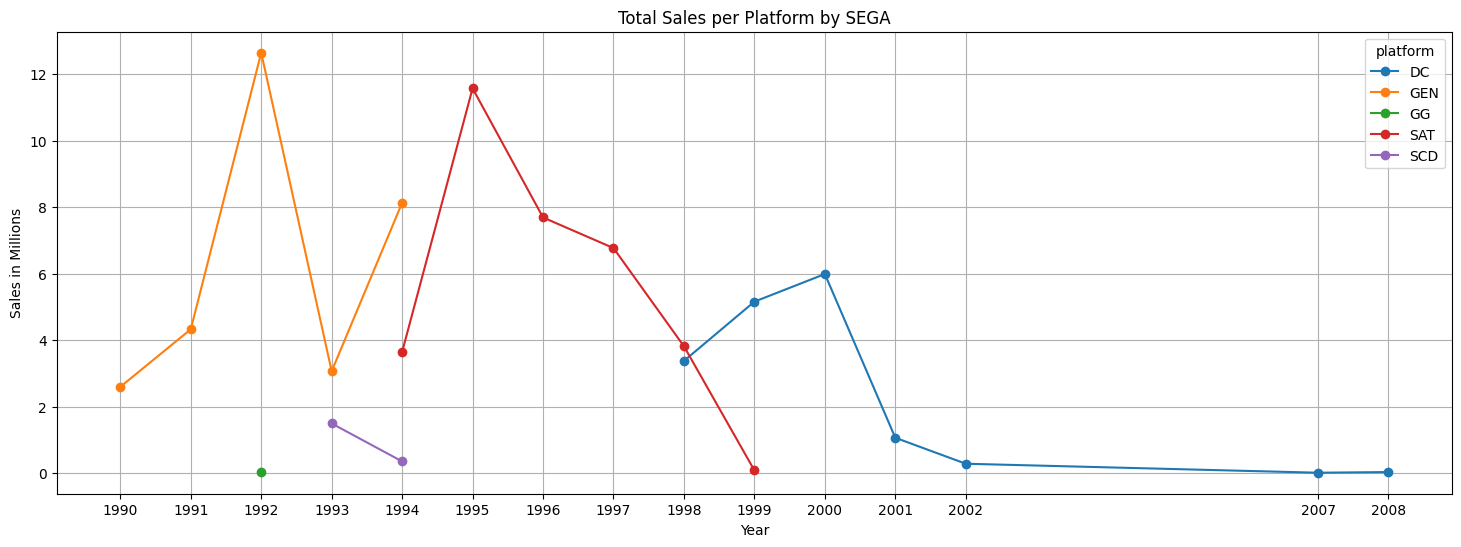

In [68]:
#Trend of sales per companies and their platforms
for company in df_games['companies'].unique():
      data = (df_games[(df_games['companies'] == company) & (df_games['year_of_release'] > 1979)]
            .loc[:, ['year_of_release', 'platform', 'total_sales']]
            .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))

      data.plot(title = f'Total Sales per Platform by {company}',
                kind='line',
                marker='o',
                figsize=(18,6),
                grid=True,
                xlabel='Year',
                ylabel='Sales in Millions',
                xticks=data.index,
                label=company,
                )

PC ha sido una de las plataformas mas versatiles debido a que su dependencia con diferentes compañias se ve reducida solo a componentes y emuladores. Nintendo po su parte ha explorado diferentes plataformas e incluso se ve multiplataformas en la misma linea de tiempo un comportamiento muy similar con Sony. A diferencia de Microsoft que se puede visualizar una transicion mas homogenea.

### Linea de tiempo en relacion por la plataforma con mas tendencia a la compra

In [69]:
games_per_platform = (df_games.loc[:,['year_of_release','platform','total_sales']]
                     .query('year_of_release > 1979')
                     .groupby(['year_of_release','platform'],as_index=False).sum()).reset_index(drop=True)

idx = games_per_platform.groupby('year_of_release')['total_sales'].idxmax()
max_platforms_per_year = games_per_platform.loc[idx].reset_index(drop=True)


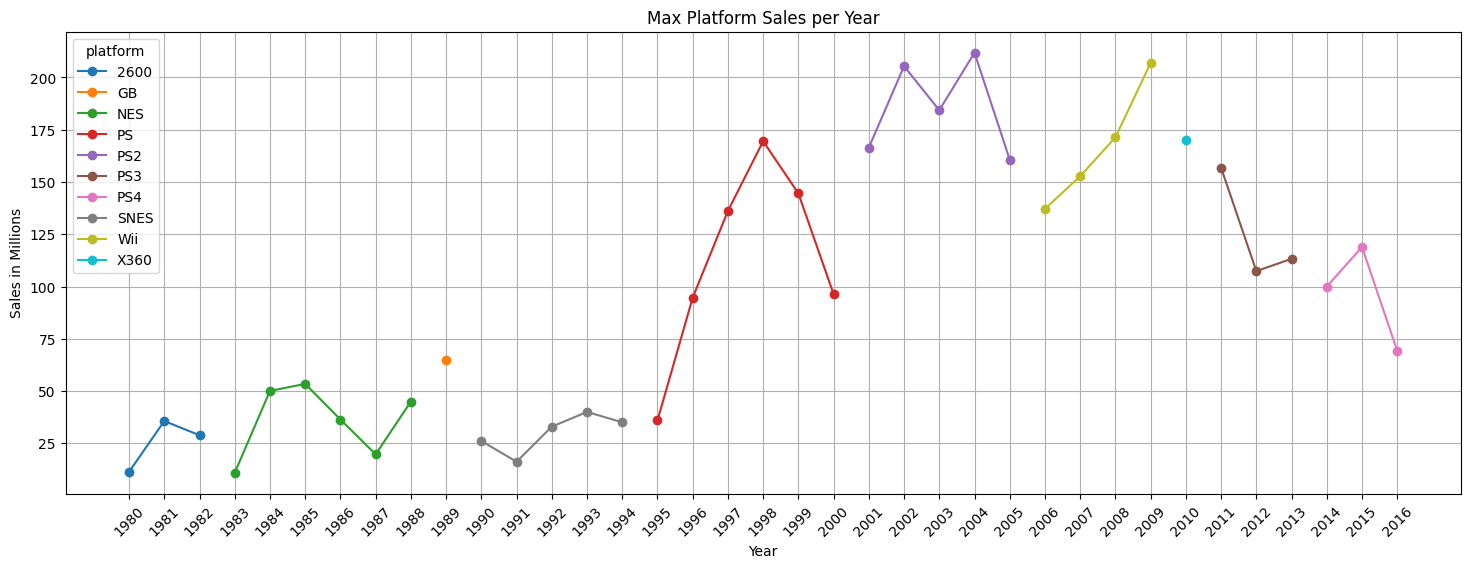

In [70]:
graph_top_per_year = (max_platforms_per_year.pivot_table(index='year_of_release', columns='platform', values='total_sales')
                      .plot(title='Max Platform Sales per Year',
                            figsize=(18,6), 
                            marker='o', 
                            grid=True, 
                            xlabel='Year', 
                            ylabel='Sales in Millions', 
                            xticks=games_per_platform['year_of_release'].unique(), 
                            label=max_platforms_per_year['platform']))
graph_top_per_year.tick_params(axis='x', rotation=45)

Se puede ver una tendecia en una linea de tiempo donde Nintendo fue la plataforma mas buscada durante 14, hasta la llegada de la Sony con su PS1 que estuvo a la vanguardia por 20 años. Con la WII nintendo recupero su puesto por 4 años y la se vuelve un poco mas disruptivo con la entreda de Microsoft.  

### Tiempo de vida registrada por plataformas

In [71]:
mean_platform_duration = (df_games.loc[:,['year_of_release','platform']]
                          .query('year_of_release > 1979')
                          .groupby(['platform'],as_index=False)
                          .agg([max,min,(lambda x: x.max() - x.min())])
                          )
mean_platform_duration.columns = ['platform','max_year','min_year','duration']

C:\Users\Develop\AppData\Local\Temp\ipykernel_3156\98691755.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  .agg([max,min,(lambda x: x.max() - x.min())])
C:\Users\Develop\AppData\Local\Temp\ipykernel_3156\98691755.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .agg([max,min,(lambda x: x.max() - x.min())])


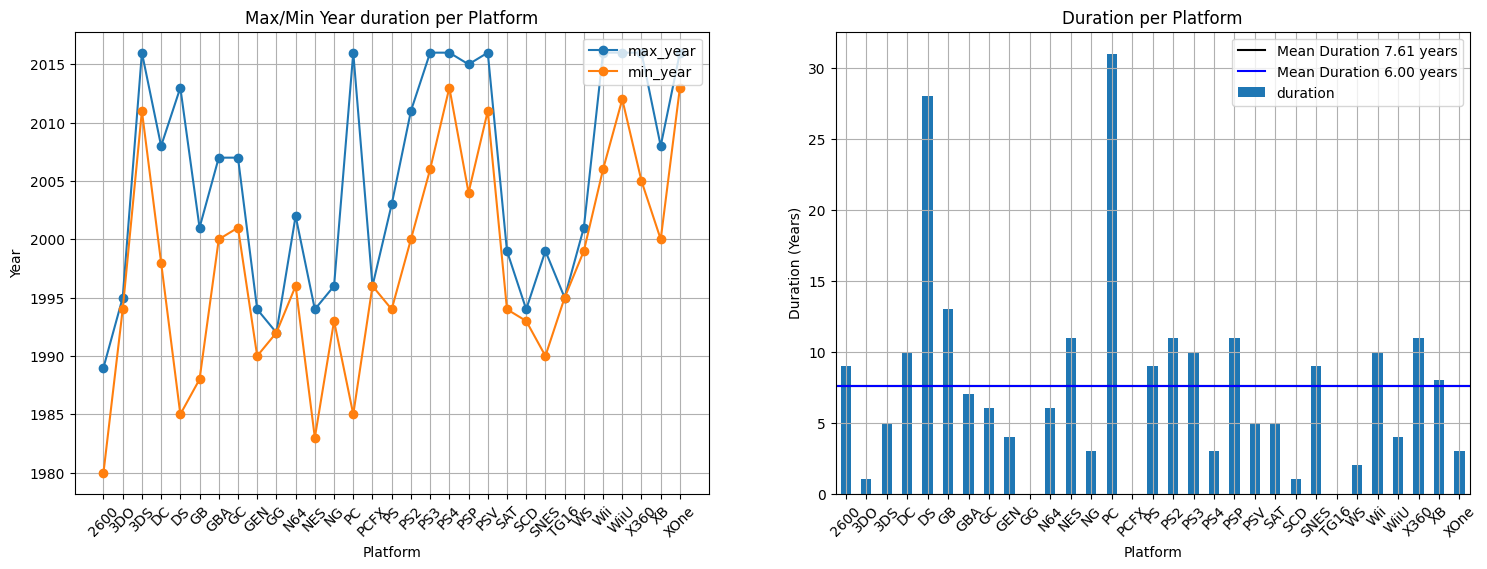

In [72]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
mean_platform_duration.plot(title='Max/Min Year duration per Platform',
                            kind='line',
                            marker='o', 
                            x='platform',
                            y='max_year',
                            ax=ax1
                            )

mean_platform_duration.plot(
                            kind='line',
                            marker='o', 
                            x='platform',
                            y='min_year',
                            ax=ax1
                            )
ax1.set_xticks(range(len(mean_platform_duration['platform'])))

# Set platform names as tick labels
ax1.set_xticklabels(mean_platform_duration['platform'], rotation=45)
ax1.set_xlabel('Platform')
ax1.set_ylabel('Year')
ax1.legend(loc='upper right')
ax1.grid(True)

mean_platform_duration.plot(title='Duration per platform',
                            kind='bar',
                            x='platform',
                            y='duration',
                            ax=ax2,
                            )

mean_duration = mean_platform_duration.duration.mean()
median_duration = mean_platform_duration.duration.median()
ax2.axhline(y=mean_duration, color='black', linestyle='-', label=f'Mean Duration {mean_duration :.2f} years')
ax2.axhline(y=mean_duration, color='blue', linestyle='-', label=f'Mean Duration {median_duration :.2f} years')
ax2.set_title('Duration per Platform')

ax2.set_xticks(range(len(mean_platform_duration['platform'])))
ax2.set_xticklabels(mean_platform_duration['platform'], rotation=45)
ax2.set_xlabel('Platform')
ax2.set_ylabel('Duration (Years)')
ax2.legend(loc='upper right')
ax2.grid(True)

A pesar de la tendencia por permanecer ciertas compañias en el top, la tendencia a permanecer la plataforma se encuentra alrededor de 6 a 7 años acorde con la cantidad de juegos lanzados por plataforma. Existen valores atipicos relacionados a PC y DS, sin embargo, esto se debe a multiples versiones en Nintendo DS y la capacidad adaptativa que representa una PC.
Teniendo en cuenta la tendencia se ve prudente tener en cuenta los datos a partir del 2013 a fin de poder intentar predecir consolas en declive y la posibilidad de nuevos lanzamientos por parte de las 3 compañias vanguardia (Microsoft, Sony y Nintendo)

In [73]:
data_games_to_analize = df_games.query('year_of_release >= 2013')

### Evaluacion de los datos en funcion de predecir 2017

<Axes: title={'center': 'Total Sales per Platform'}, xlabel='Year', ylabel='Sales in Millions'>

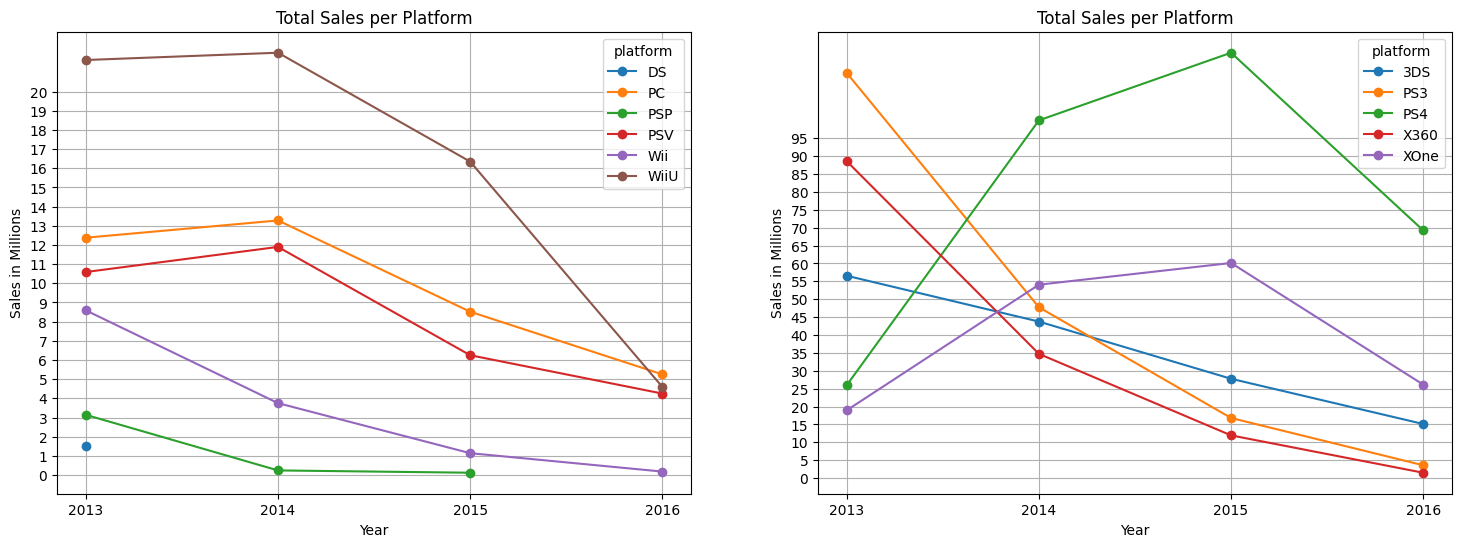

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
lower_sales = ['WiiU','PC','PSV','Wii','PSP','DS']
platforms_to_analize_lower = (data_games_to_analize.loc[:, ['year_of_release', 'platform', 'total_sales']]
                              .query('platform in @lower_sales')
                        .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
platforms_to_analize_top = (data_games_to_analize.loc[:, ['year_of_release', 'platform', 'total_sales']]
                            .query('platform not in @lower_sales')
                        .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))

platforms_to_analize_lower.plot(title = f'Total Sales per Platform',
                  kind='line',
                  marker='o',
                  figsize=(18,6),
                  grid=True,
                  xlabel='Year',
                  ylabel='Sales in Millions',
                  xticks=platforms_to_analize_lower.index,
                  yticks=range(0, 21, 1),
                  label=company,
                  ax=ax1
                  )
platforms_to_analize_top.plot(title = f'Total Sales per Platform',
                  kind='line',
                  marker='o',
                  figsize=(18,6),
                  grid=True,
                  xlabel='Year',
                  ylabel='Sales in Millions',
                  xticks=platforms_to_analize_top.index,
                  yticks=range(0, 100, 5),
                  label=company,
                  ax=ax2
                  )

### Caja de bigotes por plataforma

Outliners top: 2.909485057163642 and bottom: -1.9326019402805248 and mean: 0.48844155844155845 and std: 1.2352262748582057


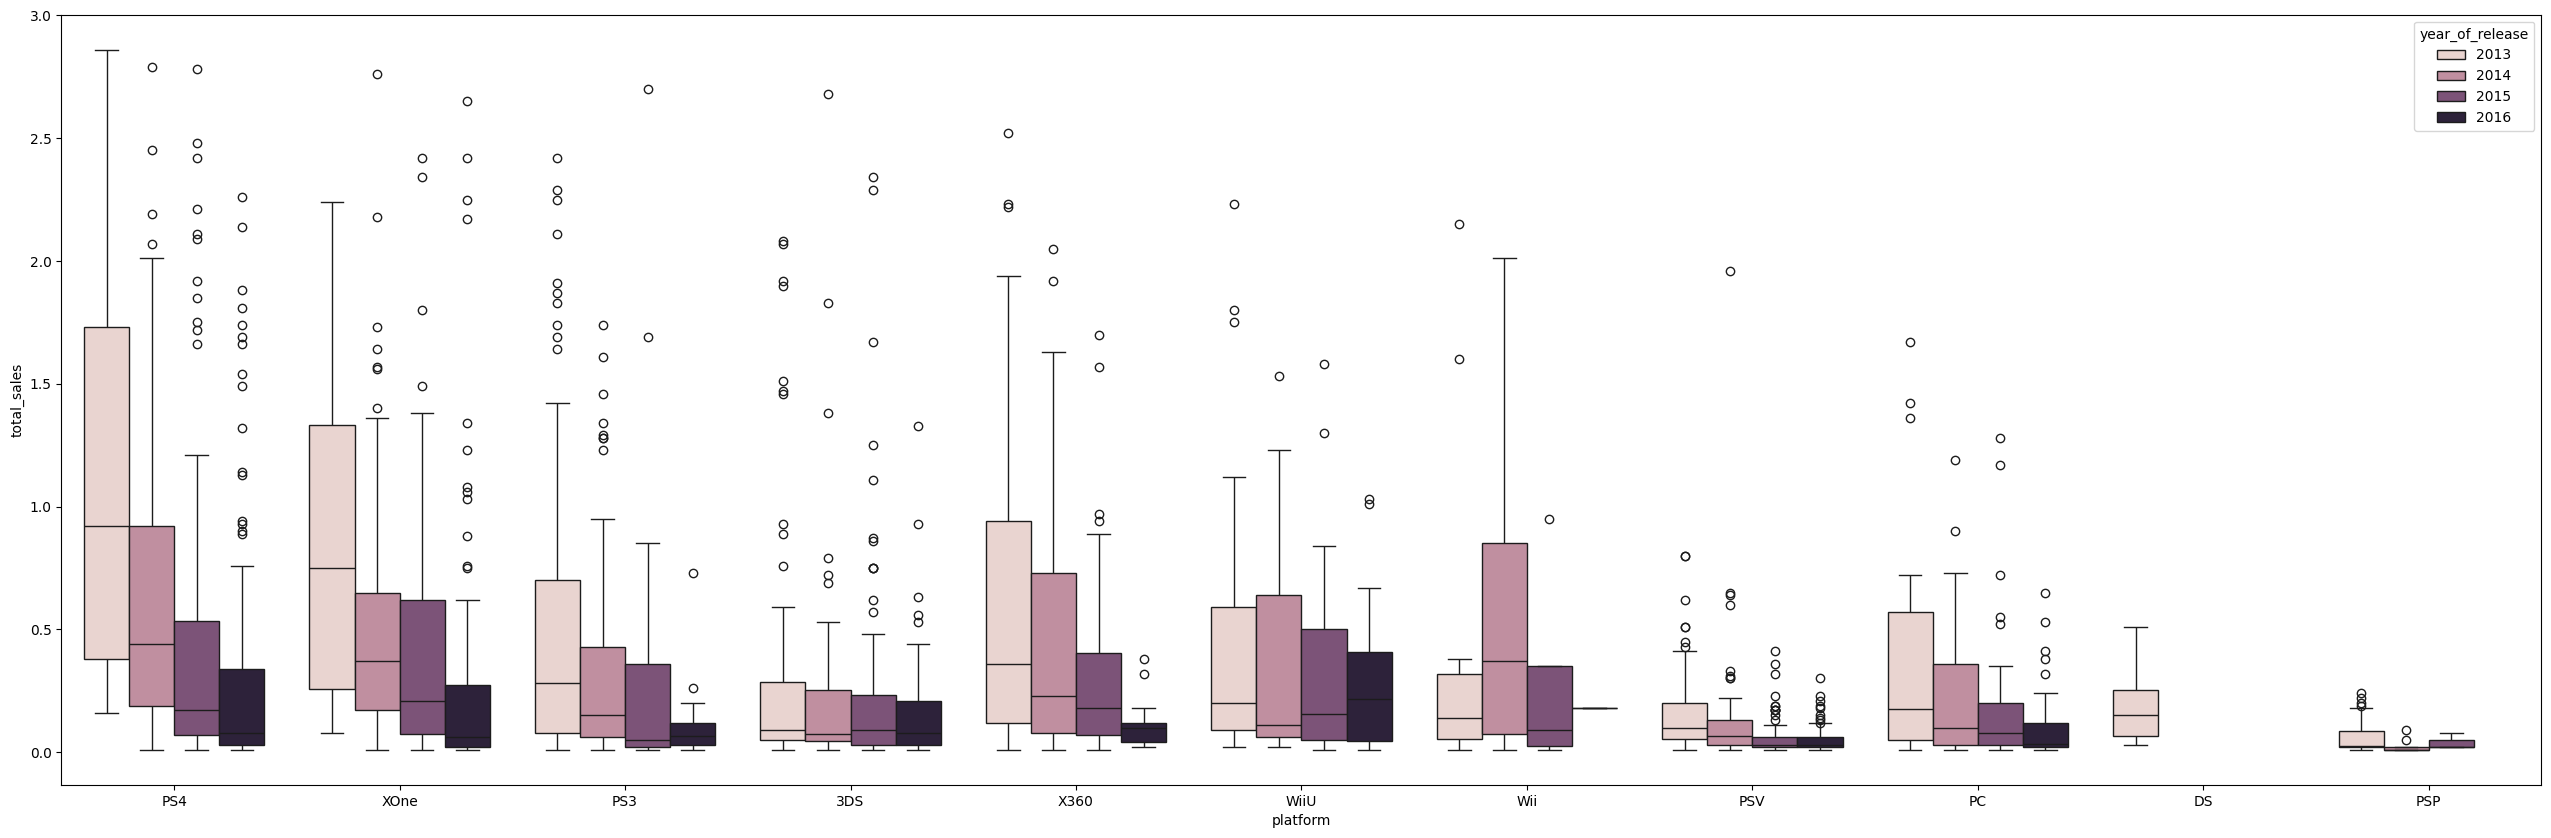

In [75]:
plt.figure(figsize=(32,10))

mu = data_games_to_analize['total_sales'].mean()
sigma = data_games_to_analize['total_sales'].std()
toprage = mu + sigma * 1.96
botrage = mu - sigma * 1.96
print(f'Outliners top: {toprage} and bottom: {botrage} and mean: {mu} and std: {sigma}')   
data_games_to_analize_adjusted = data_games_to_analize.query('total_sales < @toprage and total_sales > @botrage')

sns.boxplot(data=data_games_to_analize_adjusted,
            y='total_sales', 
            x='platform',
            hue="year_of_release")

plt.show()

Las medias y distrubuciones tienden a ser parejas en cada una de las plataformas, con excepcion a WiiU y Wii donde su mayor impacto fue en el año 2015.

### Correlacion entre ventas y score recibido en cada videojuego

<Axes: xlabel='user_score', ylabel='total_sales'>

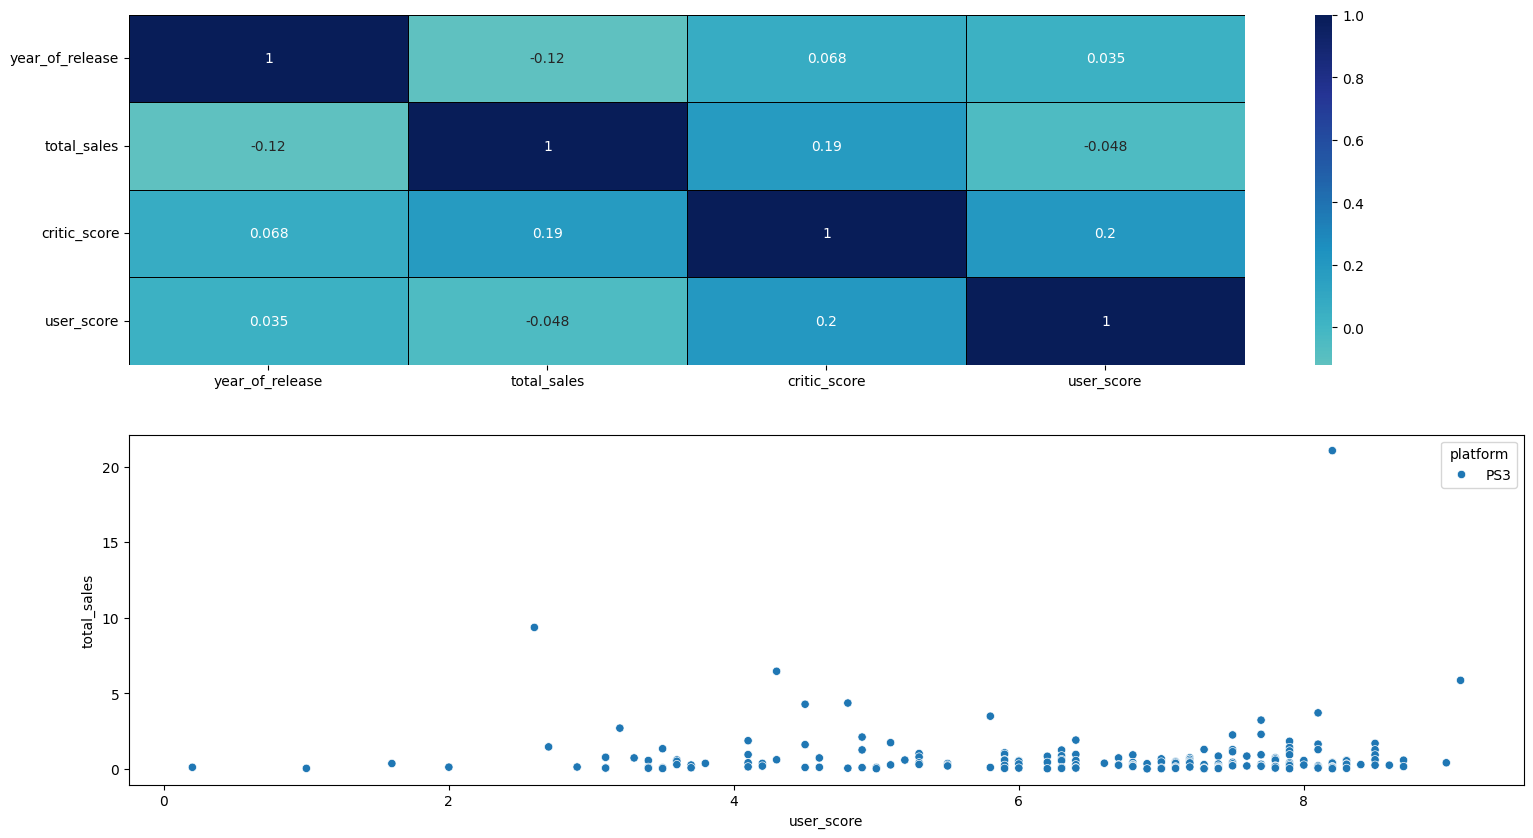

In [76]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,10))
data_sony =  data_games_to_analize.query('user_score < 99 & companies == "SONY"')
numeric_data_sony = data_sony.loc[:,['year_of_release','total_sales','critic_score', 'user_score']].select_dtypes(include=['number'])
sns.heatmap(numeric_data_sony.corr(), annot=True,cmap='YlGnBu', center=0, linewidths=0.5, linecolor='black', ax=ax1) 

sns.scatterplot(y='total_sales',x='user_score',hue="platform",data=data_sony.query('platform == "PS3"'), ax=ax2)

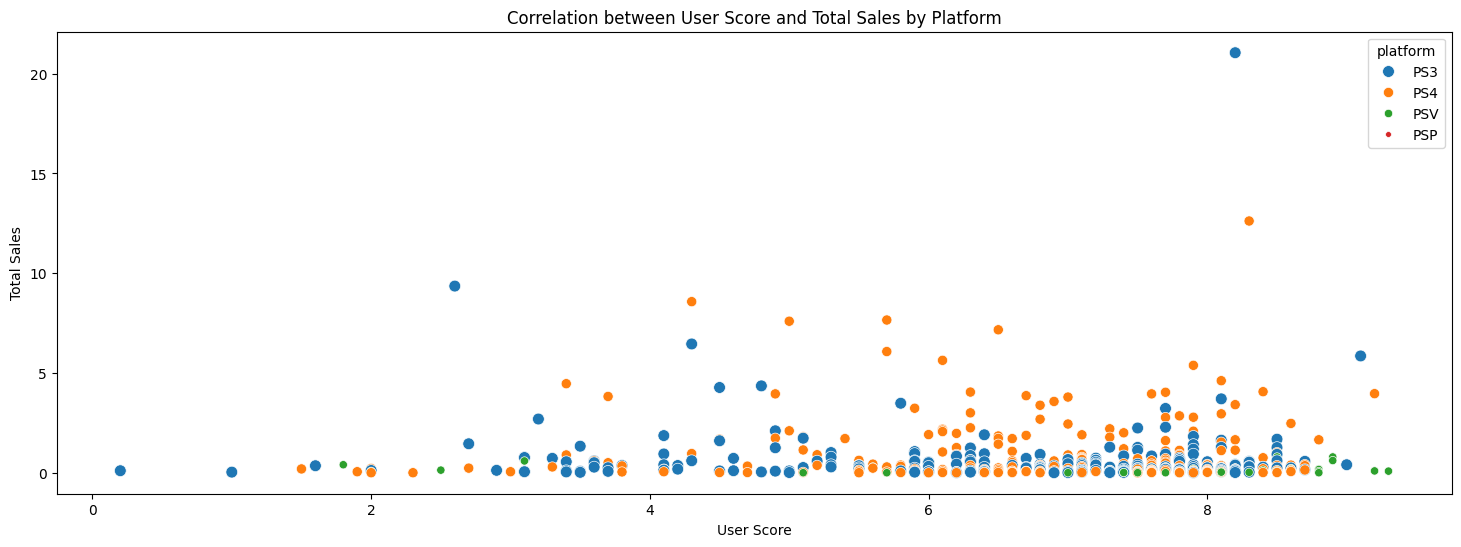

In [77]:
plt.figure(figsize=(18,6))
corr_platforms = sns.scatterplot(data=data_sony,y='total_sales',x='user_score',hue="platform",size="platform")
corr_platforms.set_title('Correlation between User Score and Total Sales by Platform')
corr_platforms.set_xlabel('User Score')
corr_platforms.set_ylabel('Total Sales')

plt.show()        

La relacion con el puntaje con respecto a el score acorde al mapa de correlacion es negativa en un 0.048, esto nos indica que a medida que el score baja las ventas se ven afectadas del mismo modo.

### Evaluacion de ventas en relacion al genero

In [78]:
genre = data_games_to_analize.pivot_table(index='platform', columns = 'genre', 
                                          values = 'name', aggfunc='count').fillna(0)

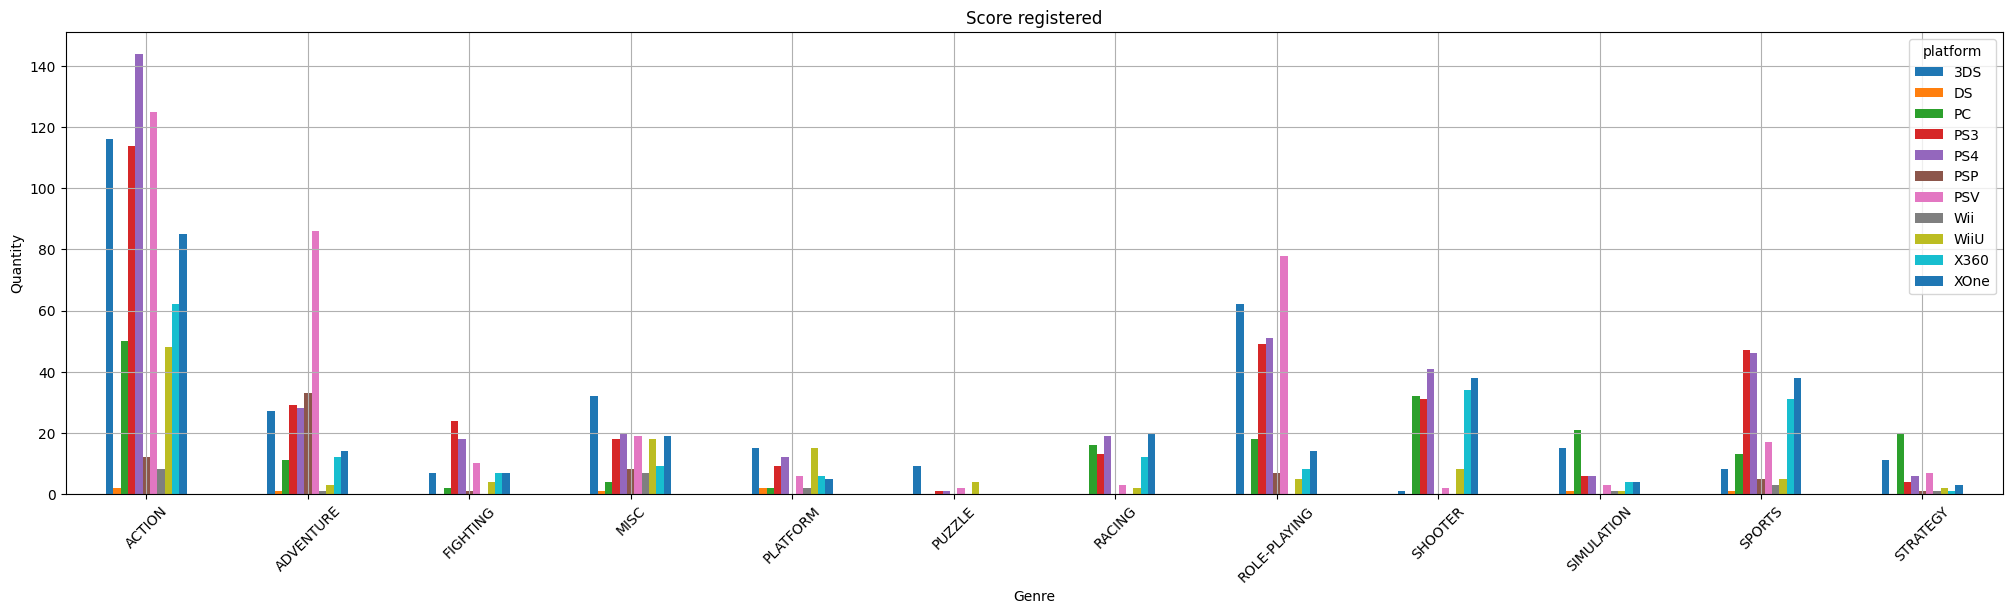

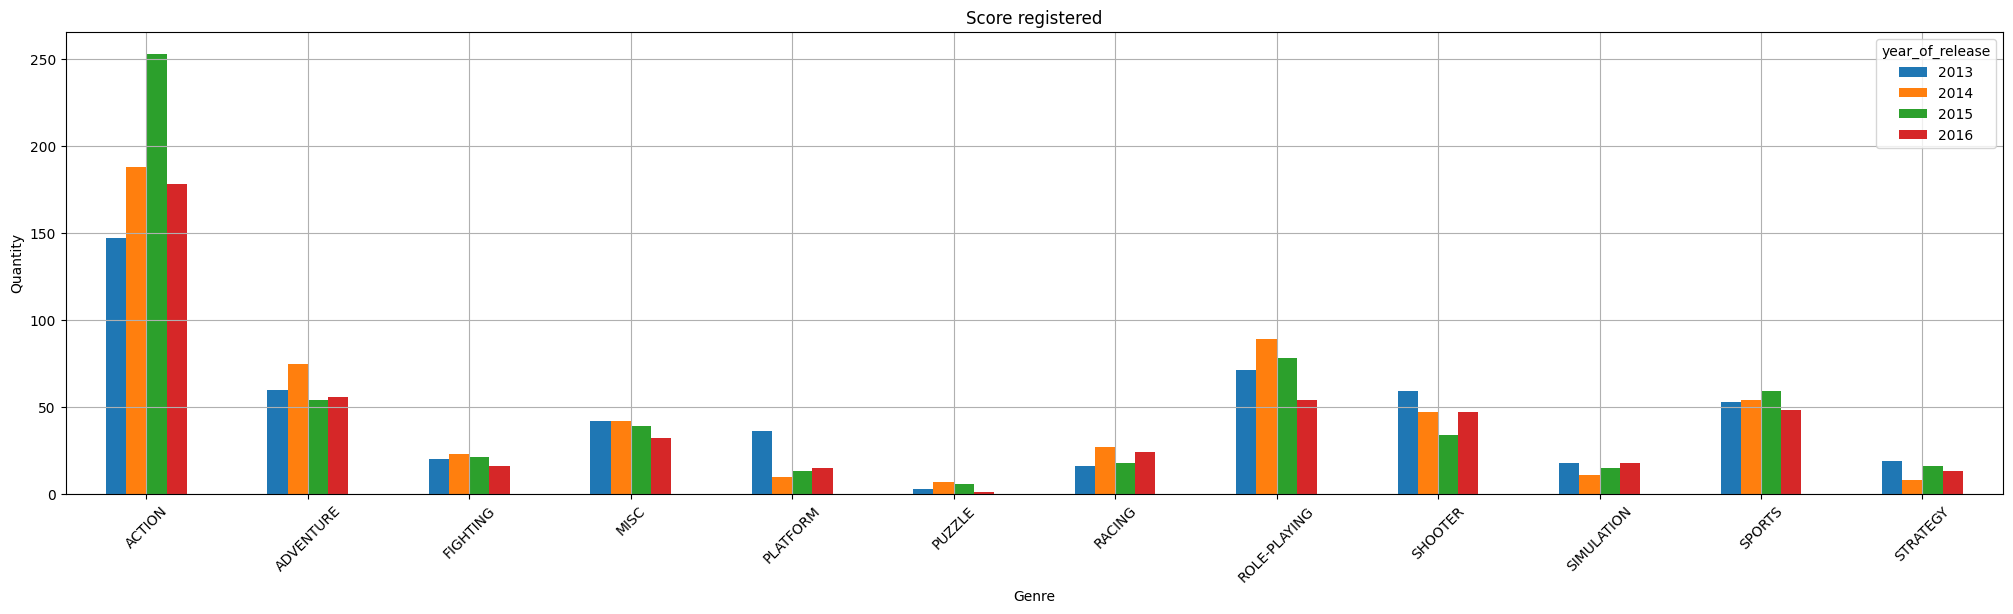

In [79]:
genre = (data_games_to_analize.pivot_table(index='genre', columns = 'platform',values = 'name', aggfunc='count')
                                  .fillna(0)
                                  .plot(title = 'Score registered',
                                        kind='bar',
                                        figsize=(25,6), 
                                        grid=True, 
                                        xlabel='Genre', 
                                        ylabel='Quantity'))
genre.tick_params(axis='x', rotation=45)

genre_year = (data_games_to_analize.pivot_table(index='genre', columns = 'year_of_release',values = 'name', aggfunc='count')
                                  .fillna(0)
                                  .plot(title = 'Score registered',
                                        kind='bar',
                                        figsize=(25,6), 
                                        grid=True, 
                                        xlabel='Genre', 
                                        ylabel='Quantity'))
genre_year.tick_params(axis='x', rotation=45)

Hay una mayor tendencia a crear videojuegos con tematicas de accion, role-playing, adventure y sports.
Apesar de la diferencia de plataformas, accion tiende a ser mas popular y rentable a excepcion de plataformas portables como lo son DS y PSP. 

## Perfil de usuario

### Analisis por regiones Top 5 de plataformas por regiones 

In [80]:
top5_platforms = pd.DataFrame(columns=['platform','year_of_release','sales','region'] )
for region in region_sales:
     for year in data_games_to_analize.year_of_release.unique():
          data = (data_games_to_analize.query('year_of_release == @year').groupby(['platform','year_of_release'],as_index=False)[region]
                    .sum()
                    .nlargest(5,['year_of_release',region]))
          data['region'] = region
          data.rename(columns={region:'sales'}, inplace=True)
          top5_platforms=pd.concat([top5_platforms,data],ignore_index=True)

C:\Users\Develop\AppData\Local\Temp\ipykernel_3156\868656737.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top5_platforms=pd.concat([top5_platforms,data],ignore_index=True)


<Figure size 1600x600 with 0 Axes>

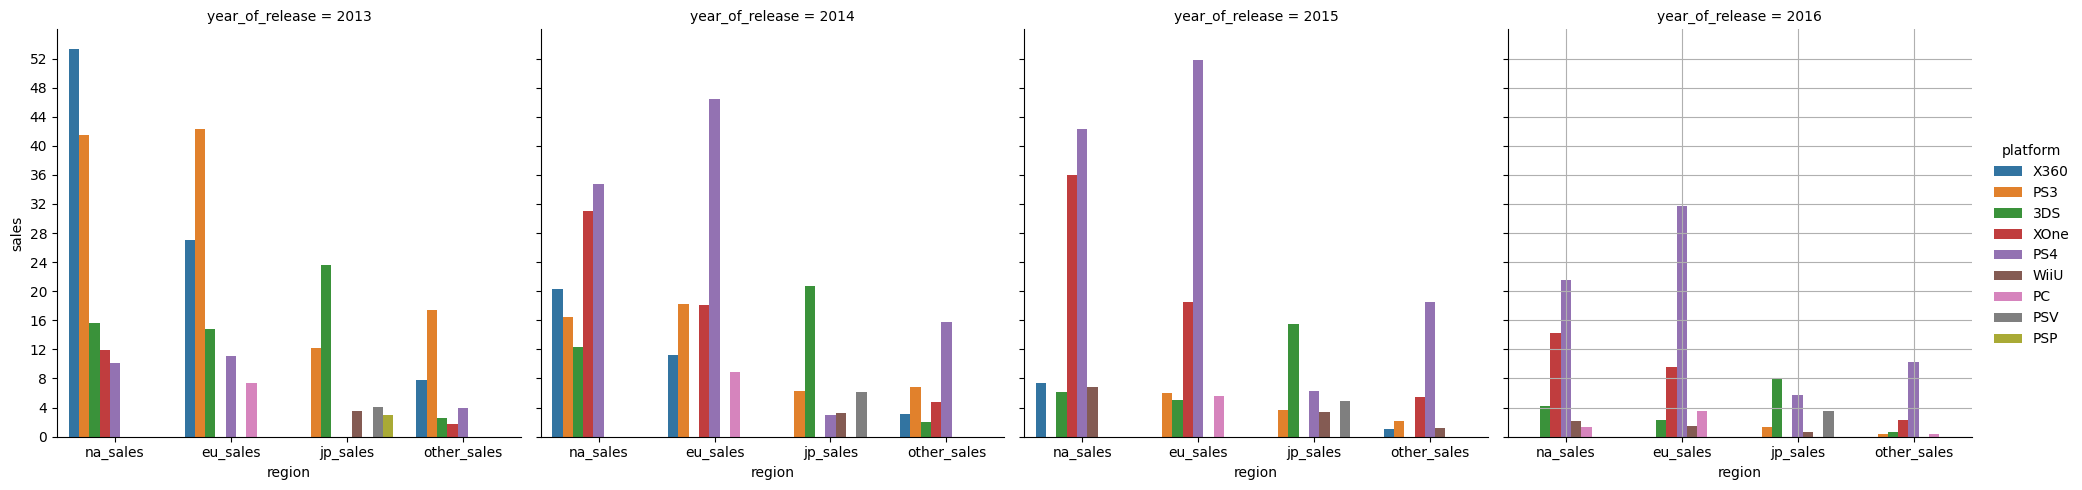

In [81]:
plt.figure(figsize=(16,6))   
sns.catplot(data=top5_platforms,kind='bar',y='sales',x='region',col ='year_of_release', hue='platform',errorbar=None) 
plt.grid(True)
plt.yticks(range(0, 56, 4))

plt.show()

En cuanto cantidad de videojuegos para plataformas con referencia a Sony y Microsoft son tendencia en la mayoria de regiones, a diferencia de JP, cuya tendencia tiende a ser Nintendo.

### Analisis por regiones Top 5 de plataformas por genero 

In [82]:

top5_genre = pd.DataFrame(columns=['genre','year_of_release','quantity_genre','region'] )
for region in region_sales:
     for year in data_games_to_analize.year_of_release.unique():
          data = (data_games_to_analize.query('year_of_release == @year').groupby(['genre','year_of_release'],as_index=False)[region]
                    .count()
                    .nlargest(5,['year_of_release',region]))
          data['region'] = region
          data.rename(columns={region:'quantity_genre'}, inplace=True)
          top5_genre=pd.concat([top5_genre,data],ignore_index=True)

<Figure size 1600x600 with 0 Axes>

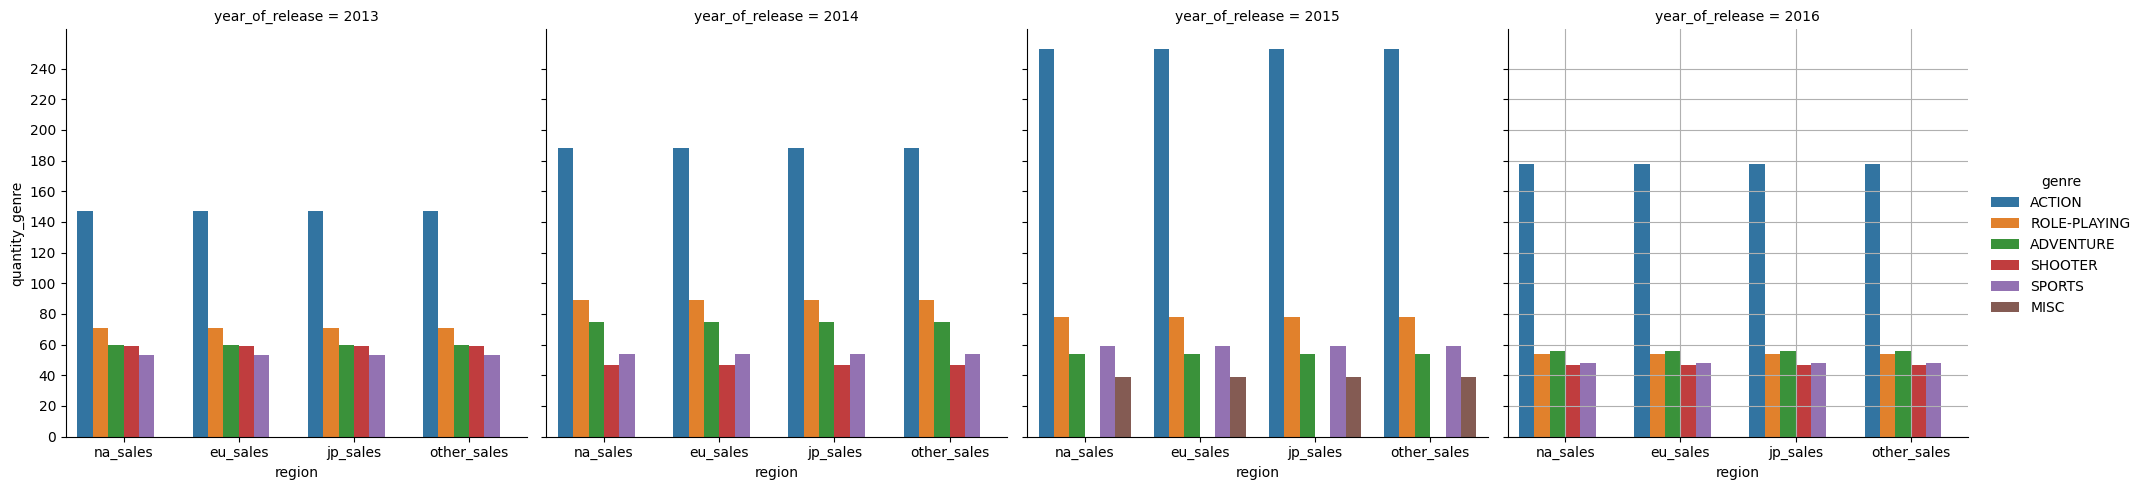

In [83]:
plt.figure(figsize=(16,6))   
sns.catplot(data=top5_genre,kind='bar',y='quantity_genre',x='region',col ='year_of_release', hue='genre',errorbar=None) 
plt.grid(True)
plt.yticks(range(0, 260, 20))

plt.show()

En cuanto cantidad de videojuegos por genero, la tendencia es buscar juegos de accion.

### Analisis por regiones segun afectacion de ESRB 

In [86]:
category_rating = pd.DataFrame({'rating':data_games_to_analize.rating.unique(),
                                'rating_category': np.arange(1, 6, 1) })

category_genre = pd.DataFrame({'genre':data_games_to_analize.genre.unique(), 
                                         'genre_category':np.arange(1, 13, 1)})
data_games_to_analize = data_games_to_analize.merge(category_rating, on='rating', how='left')
data_games_to_analize = data_games_to_analize.merge(category_genre, on='genre', how='left')

In [87]:
data_games_regions=pd.DataFrame(columns=['platform','year_of_release','genre','rating','rating_category','genre_category','sales','region'] )
for region in region_sales:
    data = data_games_to_analize.loc[:,['platform','year_of_release','genre','rating','rating_category','genre_category',region]]
    data['region'] = region
    data.rename(columns={region:'sales'}, inplace=True)
    data_games_regions=pd.concat([data_games_regions,data],ignore_index=True)

C:\Users\Develop\AppData\Local\Temp\ipykernel_3156\1995324588.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_games_regions=pd.concat([data_games_regions,data],ignore_index=True)


<Axes: >

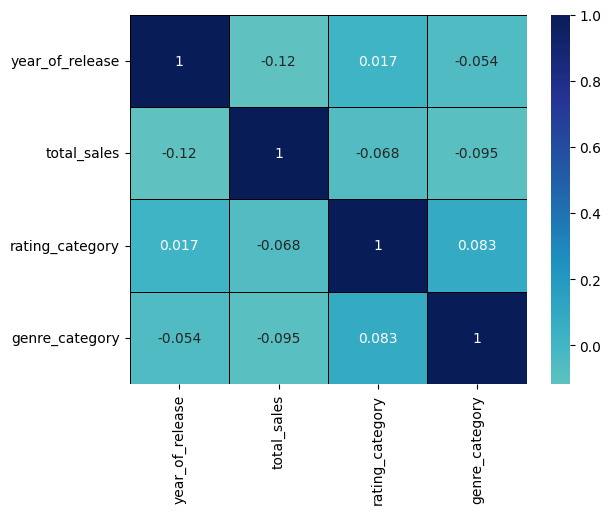

In [88]:
numeric_data = data_games_to_analize.loc[:,['year_of_release','total_sales', 'platform','rating_category','genre_category']].select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True,cmap='YlGnBu', center=0, linewidths=0.5, linecolor='black')

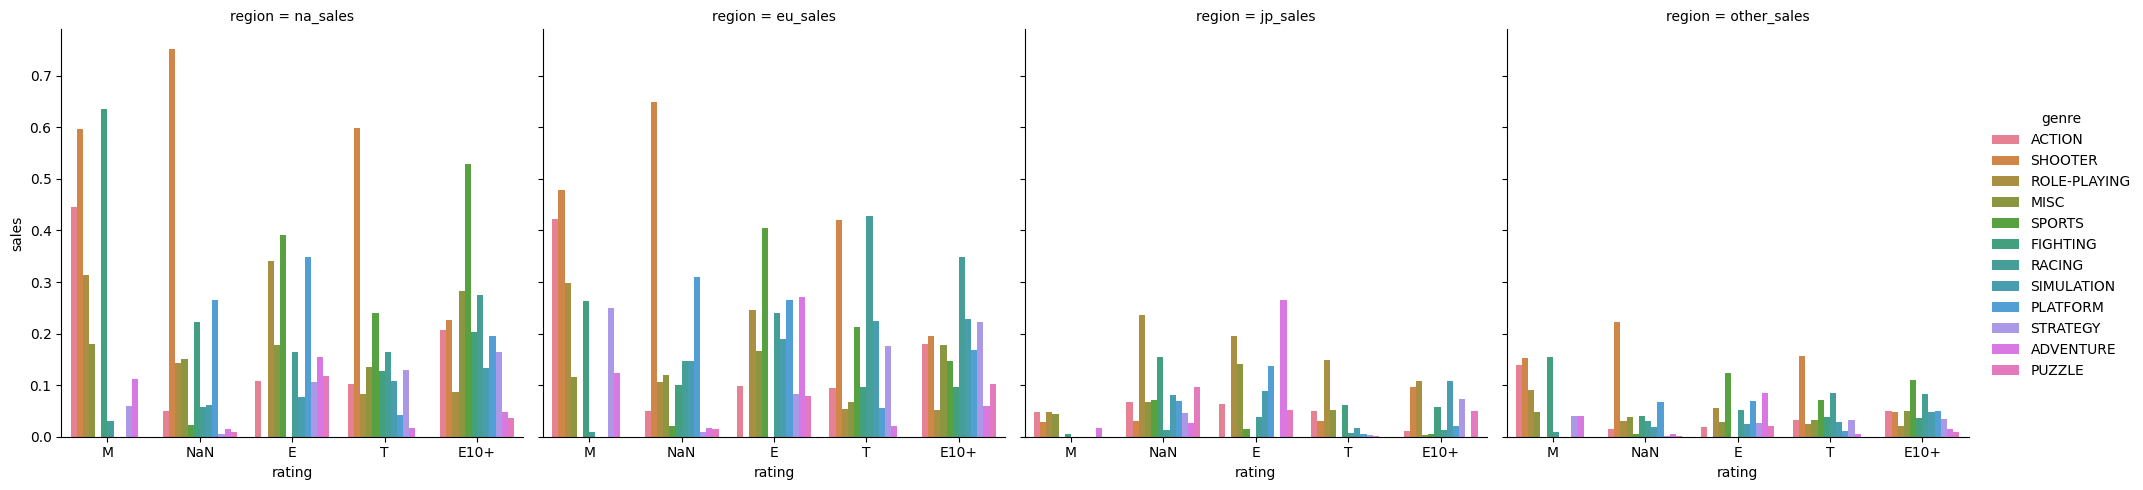

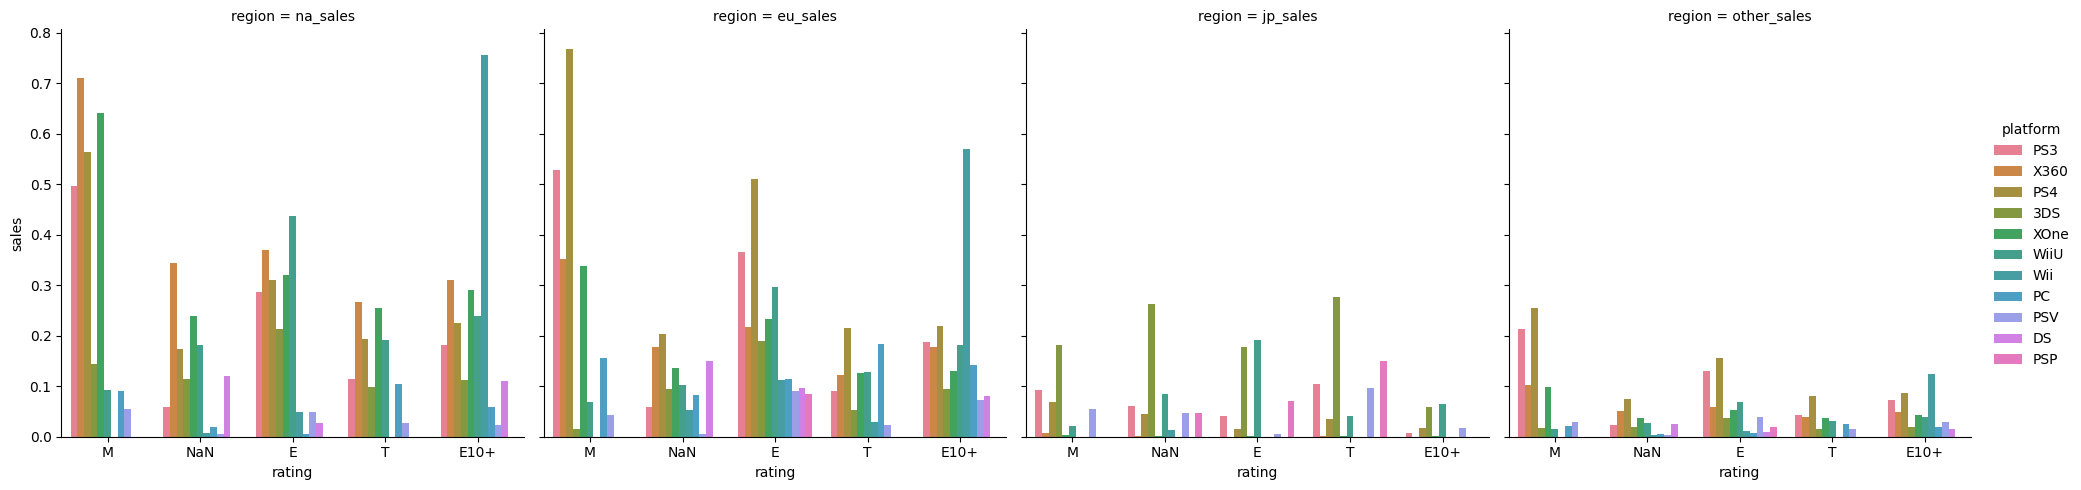

In [96]:

sns.catplot(data=data_games_regions,kind='bar',
                             y='sales',x='rating',col ='region', hue='genre',
                             errorbar=None) 

sns.catplot(data=data_games_regions,kind='bar',
                             y='sales',x='rating',col ='region', hue='platform',
                             errorbar=None) 
plt.show()

Se intenta comparar si el genero y el rate llegan a tener un impacto, sin embargo, de acuerdo al mapa de calor y al observar como varian acorde al genero se puede deducir que rating no infiere mucho en las ventas, incluso cuando este no es categorizado se presentan picos altos en diferentes plataformas con enfasis en Microsoft y Sony.

## Prueba de Hipotesis

### Xbox One y PC games

* Nula: Las clasificaciones promedio de los usuarios en distintos juegos para PC no similares a los de Xbox One 
* Alternativa: Las clasificaciones promedio de los usuarios en distintos juegos para PC son similares a los de Xbox One 

In [120]:
#Variables
xone_mu = data_games_to_analize.query('platform == "XOne"').user_score.mean()
xone_sigma = data_games_to_analize.query('platform == "XOne"').user_score.std()
pc_mu = data_games_to_analize.query('platform == "PC"').user_score.mean()
pc_sigma = data_games_to_analize.query('platform == "PC"').user_score.std()

alpha = 0.05

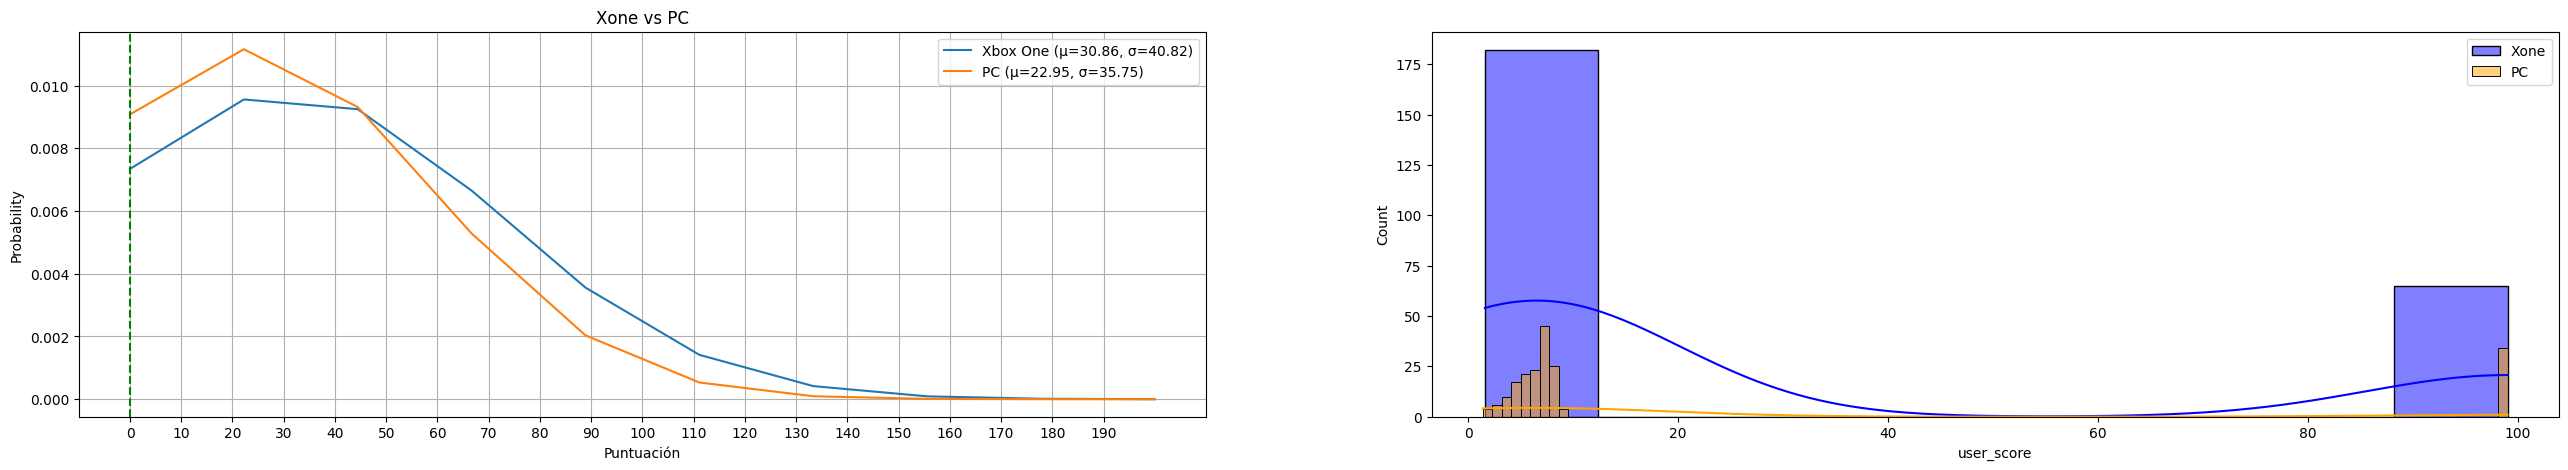

In [145]:
# Graphs of the distribution of the total cost for each plan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 5))

xone_x = np.linspace(0, 200, 10)
xone_y = norm.pdf(xone_x, xone_mu, xone_sigma)
pc_x = np.linspace(0, 200,10)
pc_y = norm.pdf(pc_x, pc_mu, pc_sigma)

ax1.plot(xone_x, xone_y, label=f'Xbox One (μ={xone_mu:.2f}, σ={xone_sigma:.2f})')
ax1.plot(pc_x, pc_y, label=f'PC (μ={pc_mu:.2f}, σ={pc_sigma:.2f})')

# Add labels, title, and legend
ax1.set_xlabel('Puntuación')
ax1.set_ylabel('Probability')
ax1.set_title('Xone vs PC')
ax1.set_xticks(range(0, 200, 10))
ax1.legend()
ax1.grid(True)
ax1.axvline(x=0, color='g', linestyle='--')



sns.histplot(data_games_to_analize.query('platform == "XOne"').user_score, ax=ax2, label="Xone", color="blue", kde=True)
sns.histplot(data_games_to_analize.query('platform == "PC"').user_score, ax=ax2, label="PC", color="orange", kde=True)
ax2.legend()
plt.show()

In [137]:
results = st.ttest_ind(data_games_to_analize.query('platform == "XOne"').user_score,
                       data_games_to_analize.query('platform == "PC"').user_score,
                       equal_var=False) # Se establece False debido a que las varianzas son ~5 puntos diferentes uno del otro 

print('valor p: ', results.pvalue*100 )  # extrae el valor p de los resultados de la prueba)

if results.pvalue < alpha: # compara el valor p con el umbral alpha
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  3.201734335094644
Rechazamos la hipótesis nula


A pensar que la informacion de PC tiene una historia mas amplia, las calificaciones recibidas a plataformas de Xbox One tienen una cantidad similar de calificaciones recibidas en el mismo periodo de tiempo, esto se le puede atribuir a la cantidad de juegos adaptados para Xbox One entorno a una competencia multiplataforma. Por lo tanto, la hipotesis nula tiene una probabilidad del 3% de ocurrir.

### Accion vs Deportes

* Nula: Las clasificaciones promedio de los usuarios para juegos de accion no son similares a los juegos de deportes  
* Alternativa: Las clasificaciones promedio de los usuarios para juegos de accion son similares a los juegos de deportes 

In [125]:
#Variables
action_mu = data_games_to_analize.query('genre == "ACTION"').user_score.mean()
action_sigma = data_games_to_analize.query('genre == "ACTION"').user_score.std()
sports_mu = data_games_to_analize.query('genre == "SPORTS"').user_score.mean()
sports_sigma = data_games_to_analize.query('genre == "SPORTS"').user_score.std()

alpha = 0.05

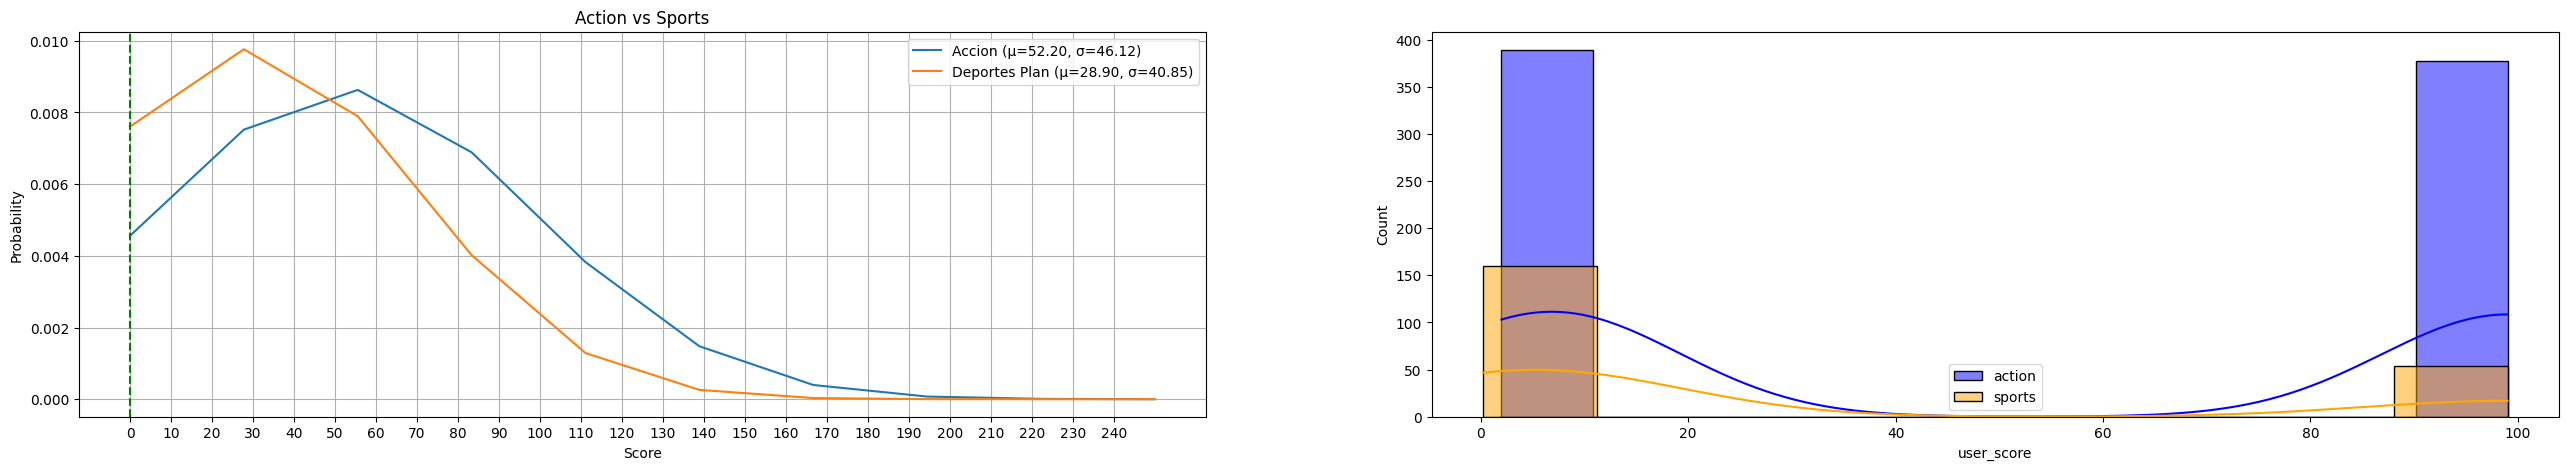

In [147]:
# Graphs of the distribution of the total cost for each plan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 5))

action_x = np.linspace(0, 250, 10)
action_y = norm.pdf(action_x, action_mu, action_sigma)
sports_x = np.linspace(0, 250,10)
sports_y = norm.pdf(sports_x, sports_mu, sports_sigma)

ax1.plot(action_x, action_y, label=f'Accion (μ={action_mu:.2f}, σ={action_sigma:.2f})')
ax1.plot(sports_x, sports_y, label=f'Deportes Plan (μ={sports_mu:.2f}, σ={sports_sigma:.2f})')

# Add labels, title, and legend
ax1.set_xlabel('Score')
ax1.set_ylabel('Probability')
ax1.set_title('Action vs Sports')
ax1.set_xticks(range(0, 250, 10))
ax1.legend()
ax1.grid(True)
ax1.axvline(x=0, color='g', linestyle='--')



sns.histplot(data_games_to_analize.query('genre == "ACTION"').user_score, ax=ax2, label="action", color="blue", kde=True)
sns.histplot(data_games_to_analize.query('genre == "SPORTS"').user_score, ax=ax2, label="sports", color="orange", kde=True)
ax2.legend()
plt.show()

In [139]:
results = st.ttest_ind(data_games_to_analize.query('genre == "ACTION"').user_score,
                       data_games_to_analize.query('genre == "SPORTS"').user_score,
                       equal_var=False) # realiza la prueba t

print('valor p: ', results.pvalue )  # extrae el valor p de los resultados de la prueba)

if results.pvalue < alpha: # compara el valor p con el umbral alpha
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  4.096804825455986e-12
Rechazamos la hipótesis nula


El comportamiento de calificacion para juegos de accion y deportes no es significativamente diferente

### Concluciones

En el 2017 acorde a los datos muestran que Ice Store deberia intentar buscar juegos de accion, aventura, deporte y shooter. En lo posible multiplataforma que pueda permitirle adaptarse a compañias como Sony, Microsoft o equipos de computo. Para Nintendo acorde a los datos tiene varias plataformas que casi culminan su tiempo de vida promedio (6 años) por lo que intentar invertir en esta plataforma no tiene mayor promesa.
Las regiones con mayor mercado serian EU y NA en lo que Sony y Microsoft respecta, sin embargo, JP se encuentra cercanamente relacionado con Nintendo por lo que intentar mantener esta misma tendencia no seria tan beneficioso.  